# Homework 13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1 (1 point)

If a dictionary has a value that is an array, we can access elements of the array as follows. (First we make the dictionary, then we access an array element.)

```python
a = {
    'CO2':np.array([0.1, 2.2, 33.3]),
    'H2O':np.array([0.2, 3.8, 44.4]),  # useful optional end comma 
    }                                  # makes each line the same
a['CO2'][1]    # --> 2.2
```

That is ```a['CO2']``` is the array, and the following ```[1]``` accesses the given element.

The heat capacity of a species $i$ is given by
$$c_{p,i}(T) = R_g(a_{0,i} + a_{1,i}T + a_{2,i}T^2 + a_{3,i}T^3 + a_{4,i}T^4)$$ where $R_g$ is the ideal gas constant, $T$ is absolute temperature in K, and $a_{k,i}$ is a constant particular to species $i$.

The following species data are given:


| Species | $a_0$           | $a_1$             | $a_2$            | $a_3$             | $a_4$             |
|---------|-----------------|-------------------|------------------|-------------------|-------------------|
| CO2     | 2.356773520E+00 |   8.984596770E-03 | -7.123562690E-06 |   2.459190220E-09 |  -1.436995480E-13 |
| H2O     | 4.198640560E+00 |  -2.036434100E-03 |  6.520402110E-06 |  -5.487970620E-09 |   1.771978170E-12 |
| O2      | 3.782456360E+00 |  -2.996734160E-03 |  9.847302010E-06 |  -9.681295090E-09 |   3.243728370E-12 |
| N2      | 3.298677000E+00 |   1.408240400E-03 | -3.963222000E-06 |   5.641515000E-09 |  -2.444854000E-12 |
| CH4     | 5.149876130E+00 |  -1.367097880E-02 |  4.918005990E-05 |  -4.847430260E-08 |   1.666939560E-11 |

* Declare a dictionary variable containing these data. It should have the np.array of sequential $a_{k,i}$ values linked to the species name.


In [2]:
species = {
        "CO2":np.array([2.356773520E+00,  8.984596770E-03, -7.123562690E-06,  2.459190220E-09, -1.436995480E-13]),
        "H2O":np.array([4.198640560E+00, -2.036434100E-03,  6.520402110E-06, -5.487970620E-09,  1.771978170E-12]),
        "O2" :np.array([3.782456360E+00, -2.996734160E-03,  9.847302010E-06, -9.681295090E-09,  3.243728370E-12]),
        "N2" :np.array([3.298677000E+00,  1.408240400E-03, -3.963222000E-06,  5.641515000E-09, -2.444854000E-12]),
        "CH4":np.array([5.149876130E+00, -1.367097880E-02,  4.918005990E-05, -4.847430260E-08,  1.666939560E-11])
}

print("Species data:")
for k, v in species.items():
    print(k)
    for i in range(len(v)):
        print("\ta%s: %s"%(i, f'{v[i]:.9E}'))

Species data:
CO2
	a0: 2.356773520E+00
	a1: 8.984596770E-03
	a2: -7.123562690E-06
	a3: 2.459190220E-09
	a4: -1.436995480E-13
H2O
	a0: 4.198640560E+00
	a1: -2.036434100E-03
	a2: 6.520402110E-06
	a3: -5.487970620E-09
	a4: 1.771978170E-12
O2
	a0: 3.782456360E+00
	a1: -2.996734160E-03
	a2: 9.847302010E-06
	a3: -9.681295090E-09
	a4: 3.243728370E-12
N2
	a0: 3.298677000E+00
	a1: 1.408240400E-03
	a2: -3.963222000E-06
	a3: 5.641515000E-09
	a4: -2.444854000E-12
CH4
	a0: 5.149876130E+00
	a1: -1.367097880E-02
	a2: 4.918005990E-05
	a3: -4.847430260E-08
	a4: 1.666939560E-11


## Problem 2 (2 points)

(Continuation of Problem 1)
* Now write a function called ```cp``` that takes two arguments: a string that gives the name of the species, and the temperature. 
* The function should return the heat capacity of the given species at the given temperature, in units $\mathrm{J/(mol\cdot K)}$.
* Test your function for "H2O" and 900 K -- the answer should be around $40~\mathrm{J/(mol\cdot K)}$.
* Make sure your code is documented, including with units where applicable
* There are multiple ways to do this function using array math or loops. Think about how to make your code efficient.
    

In [3]:
def cp(spec_name, T):
    """
    Calculates the heat capacity of a molecule given its species name and the temperature
    spec_name: Species name as a molecular formula
    T:         Temperature in Kelvins
    Returns in units of J/(mol*K)
    """
    R_g = 8.31446           # J/(mol*K)
    cp = 0
    for i in range(len(species[spec_name])):
        cp += R_g*species[spec_name][i]*T**i
    return cp               # J/(mol*K)

spec_name = "H2O"           # Species name as a molecular formula
T = 900                     # K

print("The heat capacity of %s at %sK is aproximately %s J/(mol*K)"%(
    spec_name,
    T,
    f'{cp(spec_name,T):.2f}'
))

The heat capacity of H2O at 900K is aproximately 39.99 J/(mol*K)


## Problem 3 (2 points)
(Continuation of Problem 2)
* When molecules are mixed, you can estimate the mixture heat capacity from 
$$c_p(x,T) = \sum_i x_ic_{p,i}(T),$$
where $x_i$ are species mole fractions (dimensionless).

* Write a function called ```cp_mix``` that takes two arguments: a dictionary containing the names and mole fractions of species, and the temperature.
* Document your function
* This function should evaluate the mixture $c_p$ using array math or a loop that calls the function you wrote Problem 2.
    

In [4]:
def cp_mix(mole_frac,T):
    """
    Calculates the mixture heat capacity given mole fractions and the temperature
    mole_frac: Mole fractions maped by molecular formula
    T:         Temperature in Kelvins
    Returns in units of J/(mol*K)
    """
    cp_mix = 0
    for k in mole_frac.keys():
        cp_mix += mole_frac[k] * cp(k, T)
    return cp_mix                          # J/(mol*K)

## Problem 4 (1 point)
(Continuation of Problem 3)
* Use the function ```cp_mix``` to evaluate the mixture heat capacity at T=900 K, for the following mixture (corresponding to a stoichiometric mixture of methane and air (CH4 + 2O2 + 7.52 N2):
    * $x_{CH_4} = 0.095$,
    * $x_{O2} = 0.19$,
    * $x_{N2} = 0.715$.
* How do you know your answer is right? The answer should be a "weighted average" of the species values, and closest to the value for N2.

In [5]:
mole_frac = {
    "CH4":0.095,
    "O2":0.19,
    "N2":0.715
}
print("The heat capacity of the given mixture at %sK is aproximately %s J/(mol*K)"%(
    T,
    f'{cp_mix(mole_frac,T):.2f}'
))

The heat capacity of the given mixture at 900K is aproximately 36.04 J/(mol*K)


## Problem 5 (2 points)
(Continuation of Problem 4)
* Create an array of temperatures from 300 to 1000 K with steps of 2 K.
* Use your cp_mix function to find an array of cp values at each temperature for the same mixture as in Problem 4.
* Plot $c_{p,mix}$ versus $T$.

In [6]:
T = np.arange(300,1000,2)     # K
cp_values = cp_mix(mole_frac, T)

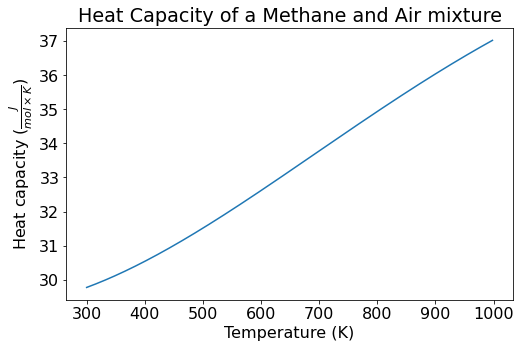

In [7]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 16})

plt.plot(T, cp_values)
plt.title("Heat Capacity of a Methane and Air mixture")
plt.xlabel("Temperature (K)")
plt.ylabel(r"Heat capacity $(\frac{J}{mol \times K})$");